# Chapter 3. Chebyshev Polynomials and Series
There are three important (somehow analogous) settings that help us to approximate functions:
- Chebyshev
- Laurent
- Fourier
The book focuses on the most relevant for numerical analysis and approximation theory, namely _Chebyshev's approach_.
Ocasionally also making use of the tools from complex analysis using _Laurent's approach_.

In fact, we have before made some analysis that brought the connections between the three, namely obtaining the Chebyshev points.

## Chebyshev polynomials
The $k$th _Chebyshev polynnomial_ can be defined as the real pasrt of the function $z^k$ on the unit circle, i.e:
$$
x = \frac{1}{2} (z + z^{-1}) = \cos \theta,\quad\theta = \cos^{-1} x,
$$
$$
T_k(x) = \frac{1}{2}(z^k + z^{-k}) = \cos (k \theta).
$$
This is quite clear to see when we realize the _Chebyshev points_ are the real part of the roots of unity.

Here let's look at the polynomials
$T_1,...,T_6$
as defined in equation (3.8)

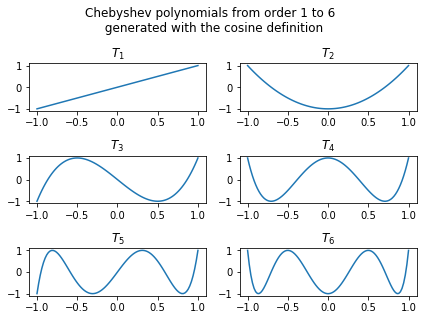

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
theta = np.arccos(x)

t_1 = np.cos(1*theta)
t_2 = np.cos(2*theta)
t_3 = np.cos(3*theta)
t_4 = np.cos(4*theta)
t_5 = np.cos(5*theta)
t_6 = np.cos(6*theta)

fig, axs = plt.subplots(3, 2)
fig.suptitle('Chebyshev polynomials from order 1 to 6 \n generated with the cosine definition', y=1.1)
axs[0, 0].plot(x, t_1)
axs[0, 0].set_title(r'$T_1$')
axs[0, 1].plot(x, t_2)
axs[0, 1].set_title(r'$T_2$')
axs[1, 0].plot(x, t_3)
axs[1, 0].set_title(r'$T_3$')
axs[1, 1].plot(x, t_4)
axs[1, 1].set_title(r'$T_4$')
axs[2, 0].plot(x, t_5)
axs[2, 0].set_title(r'$T_5$')
axs[2, 1].plot(x, t_6)
axs[2, 1].set_title(r'$T_6$')
fig.tight_layout()
plt.show()

Note the amount of extremes each curve has on the interval
$[-1,1]$,
these are the Chebyshev points, this is important to recall since will help us find a very useful property related to polynomials.

NumPy, of course, has a method to generate the polynomials directly instead of using the _cosine_ definition as seen below.

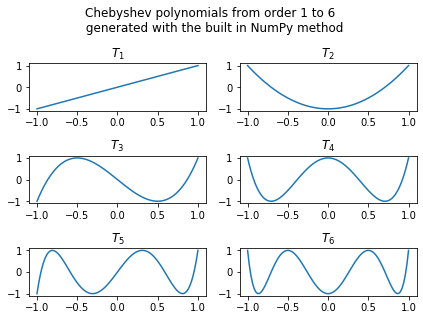

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)

t_1np = np.polynomial.Chebyshev(coef=[0, 1, 0, 0, 0, 0, 0])
t_2np = np.polynomial.Chebyshev(coef=[0, 0, 1, 0, 0, 0, 0])
t_3np = np.polynomial.Chebyshev(coef=[0, 0, 0, 1, 0, 0, 0])
t_4np = np.polynomial.Chebyshev(coef=[0, 0, 0, 0, 1, 0, 0])
t_5np = np.polynomial.Chebyshev(coef=[0, 0, 0, 0, 0, 1, 0])
t_6np = np.polynomial.Chebyshev(coef=[0, 0, 0, 0, 0, 0, 1])

fig, axs = plt.subplots(3, 2)
fig.suptitle('Chebyshev polynomials from order 1 to 6 \n generated with the built in NumPy method', y=1.1)
axs[0, 0].plot(x, t_1np(x))
axs[0, 0].set_title(r'$T_1$')
axs[0, 1].plot(x, t_2np(x))
axs[0, 1].set_title(r'$T_2$')
axs[1, 0].plot(x, t_3np(x))
axs[1, 0].set_title(r'$T_3$')
axs[1, 1].plot(x, t_4np(x))
axs[1, 1].set_title(r'$T_4$')
axs[2, 0].plot(x, t_5np(x))
axs[2, 0].set_title(r'$T_5$')
axs[2, 1].plot(x, t_6np(x))
axs[2, 1].set_title(r'$T_6$')
fig.tight_layout()
plt.show()

With the main difference that the `numpy.polynomial.Chebyshev` class will create a function that you can then evaluate on `x`.

Note that the way the polynomials are constructed is by giving the coefficients to the class, for instructive purposes here I have given an array of lenght 7 with zeros everywhere except on the position I want the polynomial.
This means that, for instance, a coefficients array
`[1, 0, 3, 2]`
will return the polynomial
$$
p = 1 \times T_0 + 0 \times T_1 + 3 \times T_2 + 2 \times T_3 = T_0 + 3 T_2 + 2 T_3
$$

This, however, still looks a bit esoterical because we haven't actually seen how the polynomials look...let us fix that

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)

t_1np = np.polynomial.chebyshev.cheb2poly(c=[0, 1, 0, 0, 0, 0, 0])
t_2np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 1, 0, 0, 0, 0])
t_3np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 0, 1, 0, 0, 0])
t_4np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 0, 0, 1, 0, 0])
t_5np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 0, 0, 0, 1, 0])
t_6np = np.polynomial.chebyshev.cheb2poly(c=[0, 0, 0, 0, 0, 0, 1])

print(
    'T1=', t_1np, '\n',
    'T2=', t_2np, '\n',
    'T3=', t_3np, '\n',
    'T4=', t_4np, '\n',
    'T5=', t_5np, '\n',
    'T6=', t_6np
)

T1= [0. 1.] 
 T2= [-1.  0.  2.] 
 T3= [ 0. -3.  0.  4.] 
 T4= [ 1.  0. -8.  0.  8.] 
 T5= [  0.   5.   0. -20.   0.  16.] 
 T6= [ -1.   0.  18.   0. -48.   0.  32.]


We interpret the output above as the coefficients of the polynomials ordered from lower to higher degree, so that we have for instance:
$$
\begin{align*}
T_1(x) &= x \\
T_5(x) &= 5x - 20 x^3 + 16 x^5.
\end{align*}
$$

Familiar an all, we should avoid using the monomial basis for now.
Naturally we can express a polynomial using the Chebysev basis, for instance
$$
x^5 = \frac{5}{80} T_5(x) + \frac{5}{16} T_3(x) + \frac{5}{8} T_1(x).
$$

We can verify this numerically on Python by using the oposite method to what we just used to find the monomial expansion of Chebysev polynomials (`cheb2poly`), namely `poly2cheb`

In [41]:
import numpy as np

p = np.polynomial.chebyshev.poly2cheb(pol=[0, 0, 0, 0, 0, 1])

print('x^5 =', p)

x^5 = [0.     0.625  0.     0.3125 0.     0.0625]


Again, recall that Python gives you the coefficient from the lower to the higher order.

Note that the functions
$T_0,...,T_n$
are a basis for the space of polynomials of order
$n$,
$\mathcal{P}_n$.
So that
$p$
can be written as a finite _Chebyshev series_.

In fact, a polynomial
$p$
is determined by its values at Chebyshev points therefore there is a one-to-one linear mapping between values at Chebyshev points and the Chebyshev expansion coefficients.